### Reservoir Sampling

- 비복원 추출

In [1]:
# 모듈 불러오기
from tqdm import tqdm
import random

In [2]:
class Reservoir:
    def __init__(self,k):
        self.sampled = []
        self.k = k
        self.cnt = 0
        
    def put(self, item):
        if self.cnt < self.k:
            self.sampled.append(item)
        else:
            r = random.randint(0, self.cnt)
            if r < self.k:
                self.sampled[r] = item

        self.cnt += 1

- 복원추출

In [3]:
class ReservoirWithReplacement:
    def __init__(self,k):
        self.k = k
        self.itemList = []
        self.sampled = []
        
    def makeItemList(self, ran):
        self.itemList.append(ran)
        return self.itemList # for문이 돌 때마다 itemList를 갱신해줌

    def sampling(self, item): # 갱신된 itemList를 받음
        self.sampled = [] # 초기화 해줌
        for i in range(self.k): # k값보다 넘어갈 때 제한을 k로 둠
            r = random.randrange(0, len(item))
            self.sampled.append(item[r])

In [4]:
# count
rv_cnt = {}
rv_wr_cnt = {}

for j in tqdm(range(10000)):
    
    reservoir = Reservoir(100)
    reservoir_wr = ReservoirWithReplacement(100)
    
    for i in range(1000):
        # 비복원
        reservoir.put(i)

        # 복원
        item = reservoir_wr.makeItemList(i)
        reservoir_wr.sampling(item)

    # 비복원
    for x in reservoir.sampled:
        if x in rv_cnt:
            rv_cnt[x] += 1
        else:
            rv_cnt[x] = 1
    # 복원
    for y in reservoir_wr.sampled:
        if y in rv_wr_cnt:
            rv_wr_cnt[y] += 1
        else:
            rv_wr_cnt[y] = 1    

100%|████████████████████████████████████████████████████████████████████████████| 10000/10000 [13:10<00:00, 12.64it/s]


In [5]:
# 갯수 확인
len(set(rv_wr_cnt.keys())), len(set(rv_cnt.keys()))

(1000, 1000)

- 시각화

In [6]:
# ploting을 위한 정렬
rv_wr_cnt = dict(sorted(rv_wr_cnt.items()))
rv_cnt = dict(sorted(rv_cnt.items()))

In [7]:
import matplotlib.pyplot as plt
import matplotlib as mpl
# 배경색 흰색으로 맞춰줌
mpl.rc('figure', facecolor = 'w', edgecolor ='w')

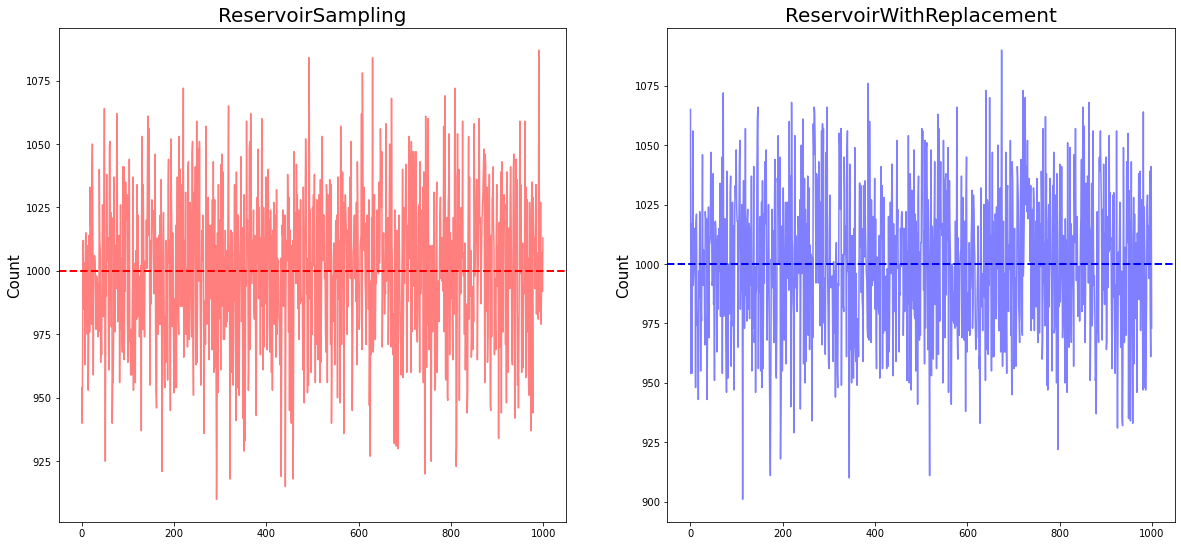

In [8]:
plt.figure(figsize=(20,20))
# 비복원
plt.subplot(2, 2, 1)
plt.plot(rv_cnt.keys(), rv_cnt.values(), color = 'red', alpha = 0.5)
plt.axhline(1000, 0, 1, color='red', linestyle='--', linewidth=2)
plt.title('ReservoirSampling', size=20)
plt.ylabel('Count', size=15)
# 복원
plt.subplot(2, 2, 2)
plt.plot(rv_wr_cnt.keys(), rv_wr_cnt.values(), color = 'blue', alpha = 0.5)
plt.axhline(1000, 0, 1, color='blue', linestyle='--', linewidth=2)
plt.title('ReservoirWithReplacement', size=20)
plt.ylabel('Count', size=15)
# plt.savefig('./img/Reservoir.png')
plt.show()